In [ ]:
import plotly.offline as pyo

import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud, STOPWORDS
from PIL import Image

import plotly.graph_objs as go
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

pd.options.display.max_columns = None

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
df = pd.read_csv('/content/Crop_recommendation.csv')
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [ ]:
df.shape

(2200, 8)

In [ ]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


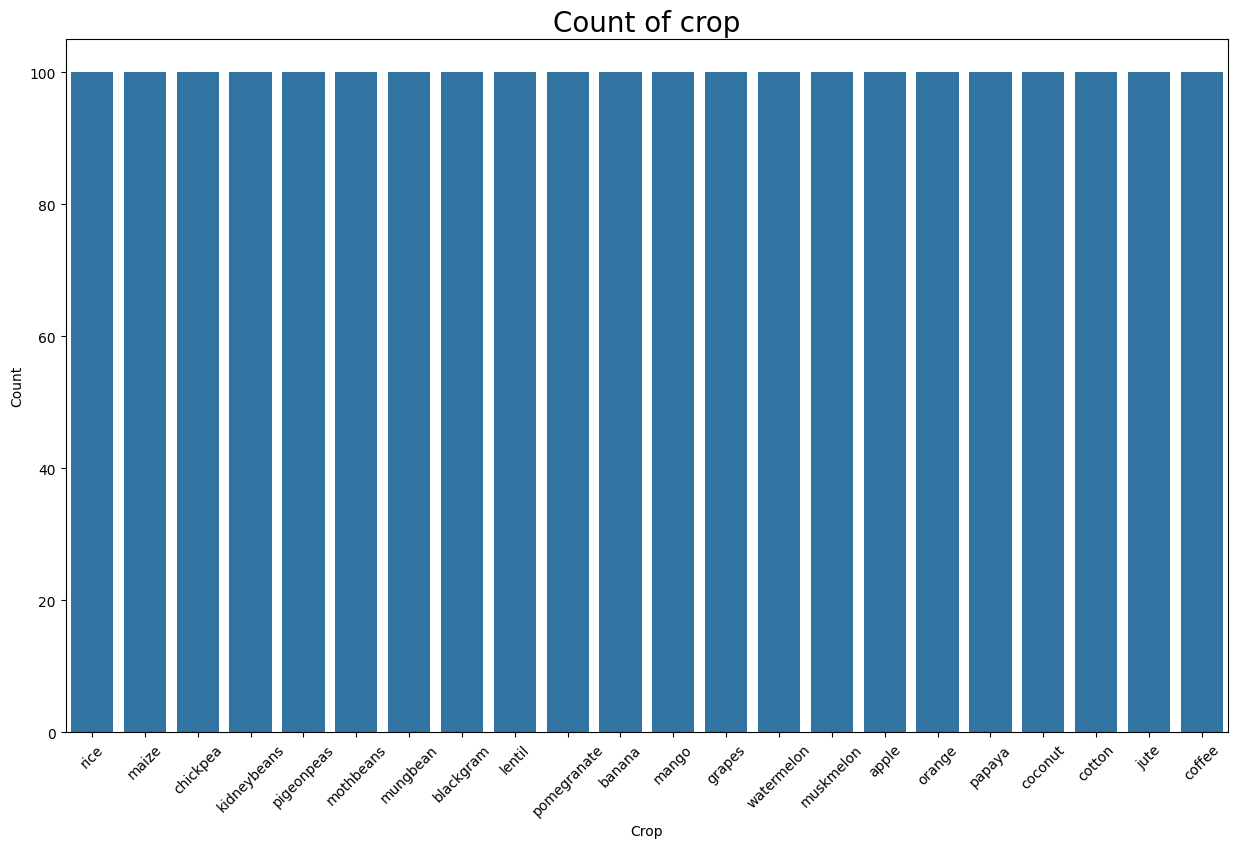

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(15, 9))
sns.countplot(data=df, x='label')
ax.set(xlabel='Crop')
ax.set(ylabel='Count')
plt.xticks(rotation=45)

plt.title('Count of crop', fontsize = 20, c='black')
plt.show()

ValueError: could not convert string to float: 'rice'

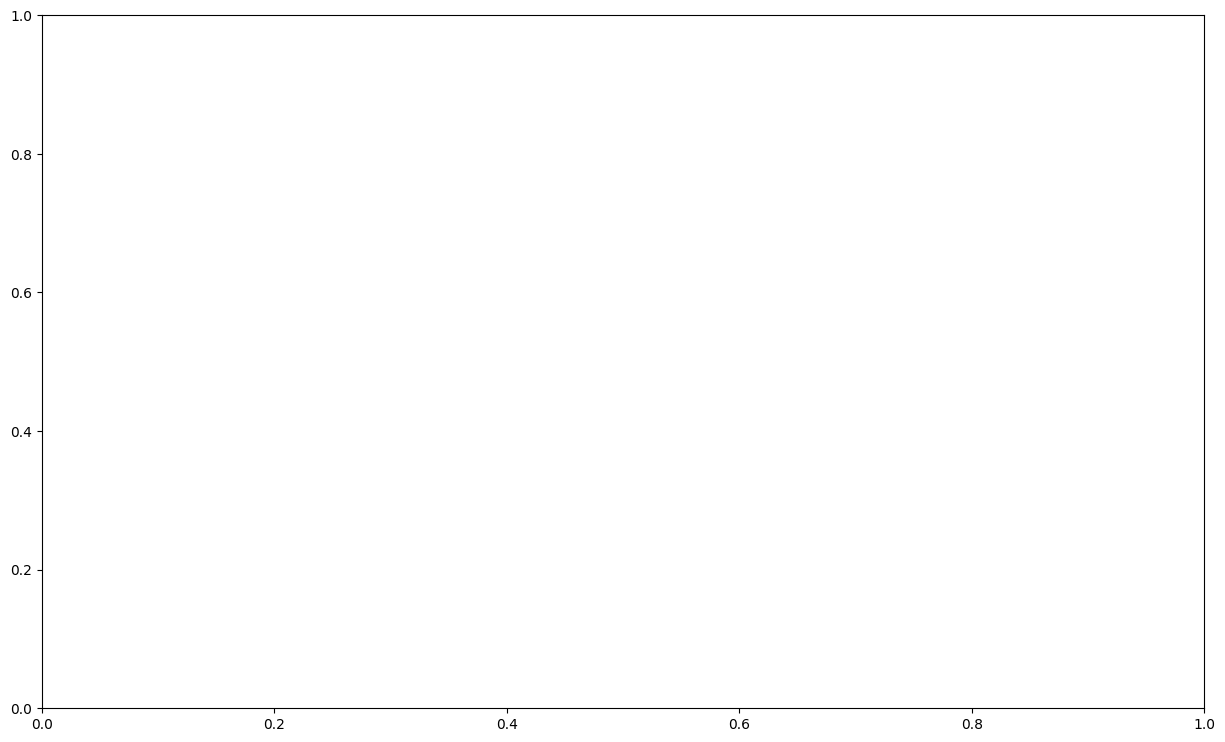

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(15, 9))
sns.heatmap(df.corr(), annot=True)
ax.set(xlabel='features')
ax.set(ylabel='features')

plt.title('Correlation between different features', fontsize = 20, c='black')
plt.show()

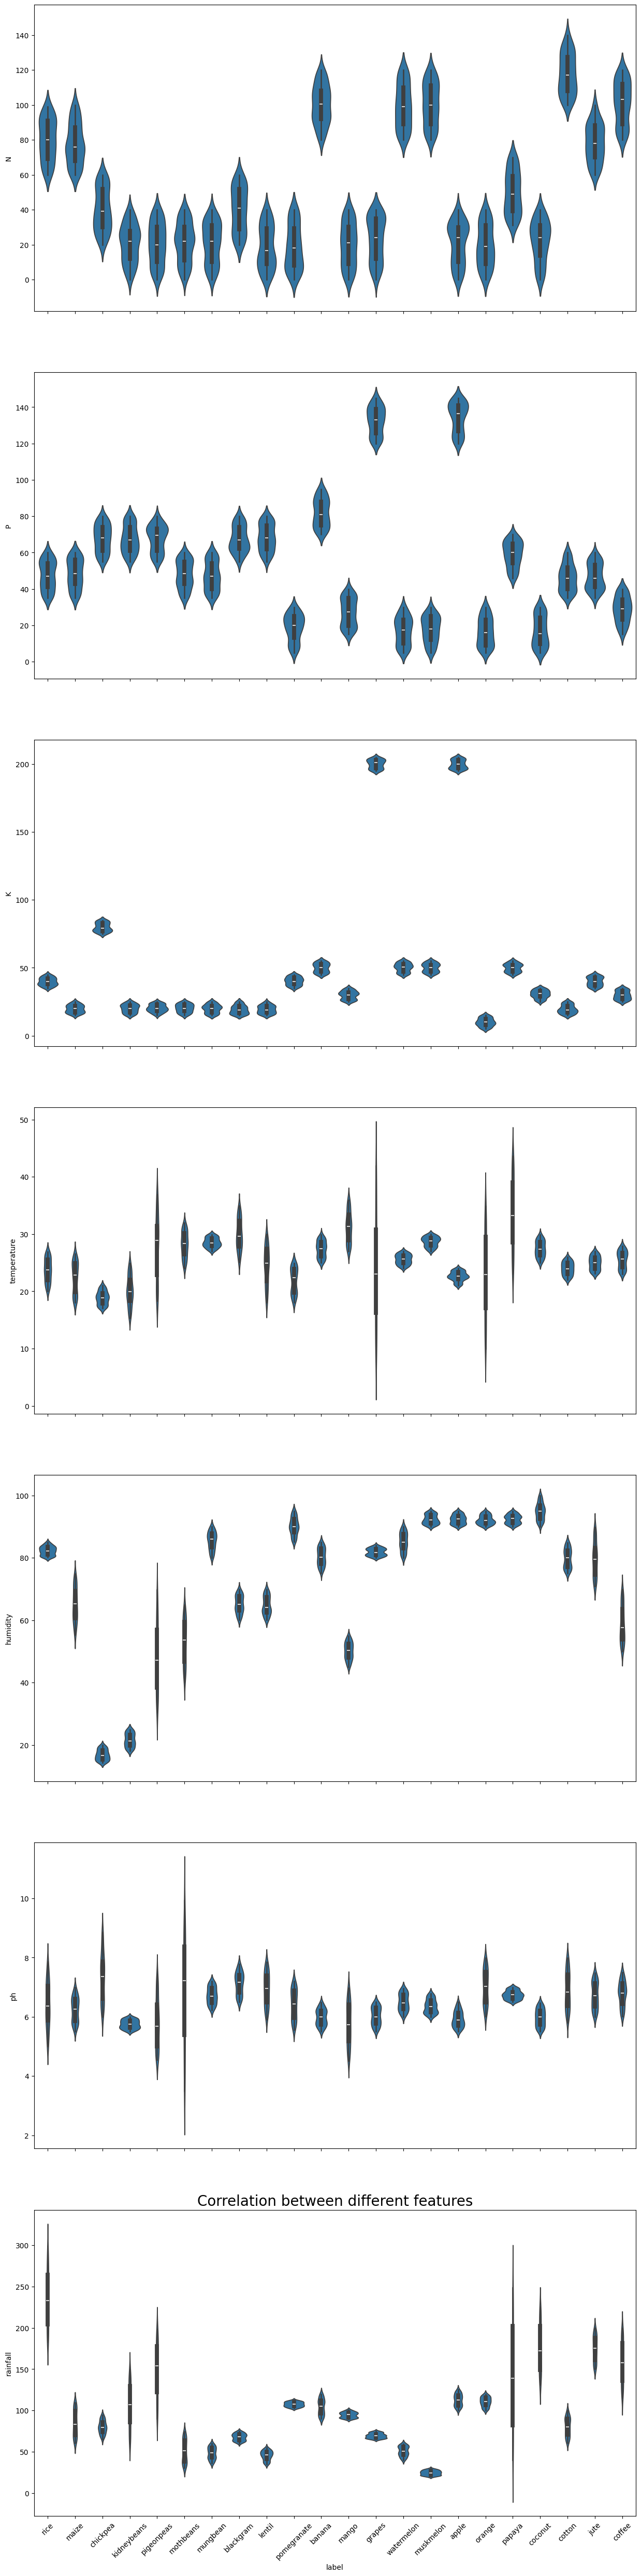

In [ ]:


columns = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']


fig, ax = plt.subplots(7, 1, figsize=(15, 63), sharex=True)

i = 0
for column in columns:
    sns.violinplot(data=df, x='label', y=column, ax=ax[i])
    plt.xticks(rotation=45)
    i = i + 1

plt.title('Correlation between different features', fontsize = 20, c='black')
plt.show()



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# Target and features
target = ['label']
features = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']

X = df[features]
y = df[target]

# Encode target labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y.values.ravel())

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.33, random_state=42, shuffle=True
)

# Models
models = [
    ('LogisticRegression', LogisticRegression(random_state=0)),
    ('DecisionTreeClassifier', DecisionTreeClassifier(random_state=0)),
    ('XGBClassifier', XGBClassifier(random_state=0)),
    ('GradientBoostingClassifier', GradientBoostingClassifier(random_state=0)),
    ('KNeighborsClassifier', KNeighborsClassifier()),
    ('RandomForestClassifier', RandomForestClassifier(random_state=0)),
]

model_name = []
accuracy = []

# Train and evaluate models
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    model_name.append(name)
    accuracy.append(metrics.accuracy_score(y_test, y_pred))
    print(f"{name}: {metrics.accuracy_score(y_test, y_pred):.4f}")

# Example of mapping predictions back to labels
example_model = RandomForestClassifier(random_state=0)
example_model.fit(X_train, y_train)
example_pred = example_model.predict(X_test)
example_pred_labels = label_encoder.inverse_transform(example_pred)

LogisticRegression: 0.9504
DecisionTreeClassifier: 0.9725
XGBClassifier: 0.9793
GradientBoostingClassifier: 0.9848
KNeighborsClassifier: 0.9752
RandomForestClassifier: 0.9931


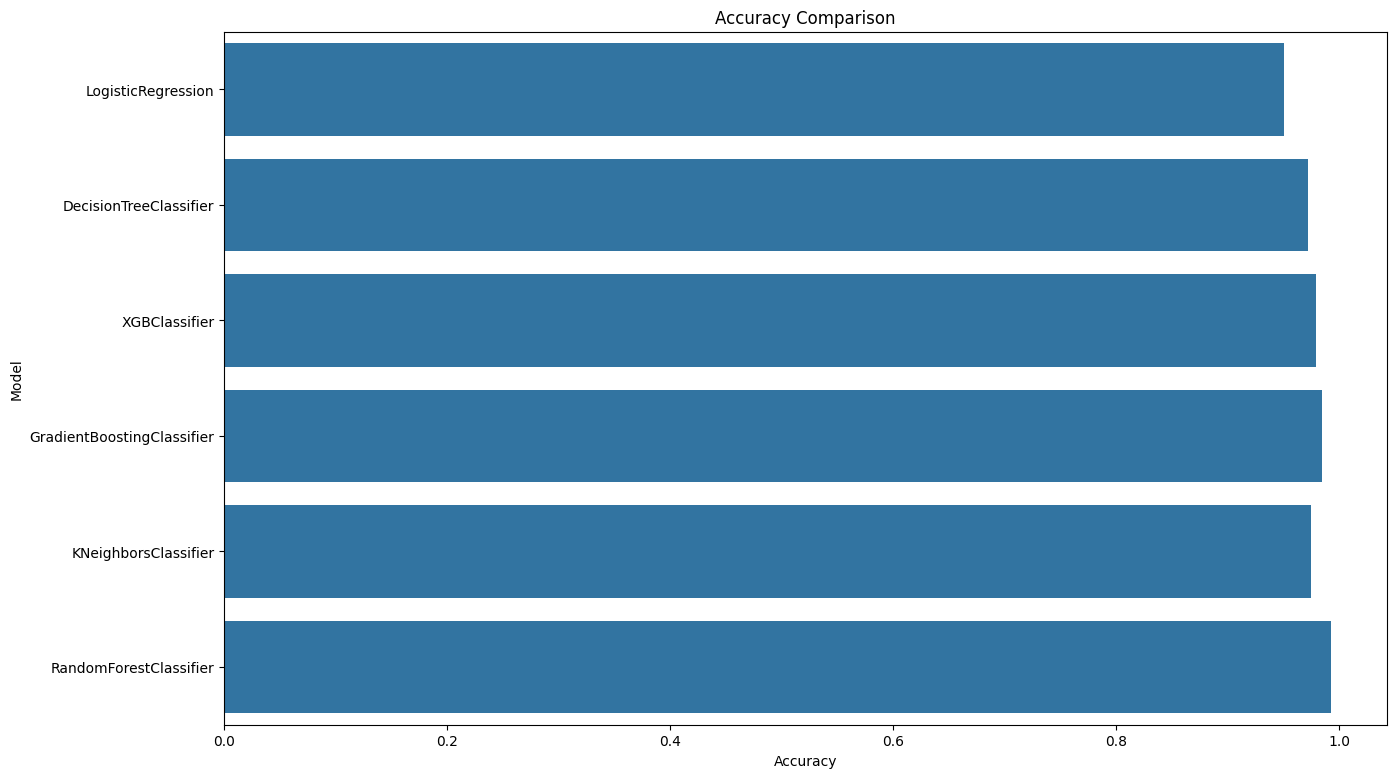

In [ ]:
plt.figure(figsize=(15,9))
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Model')
sns.barplot(x = accuracy, y = model_name)
plt.show()

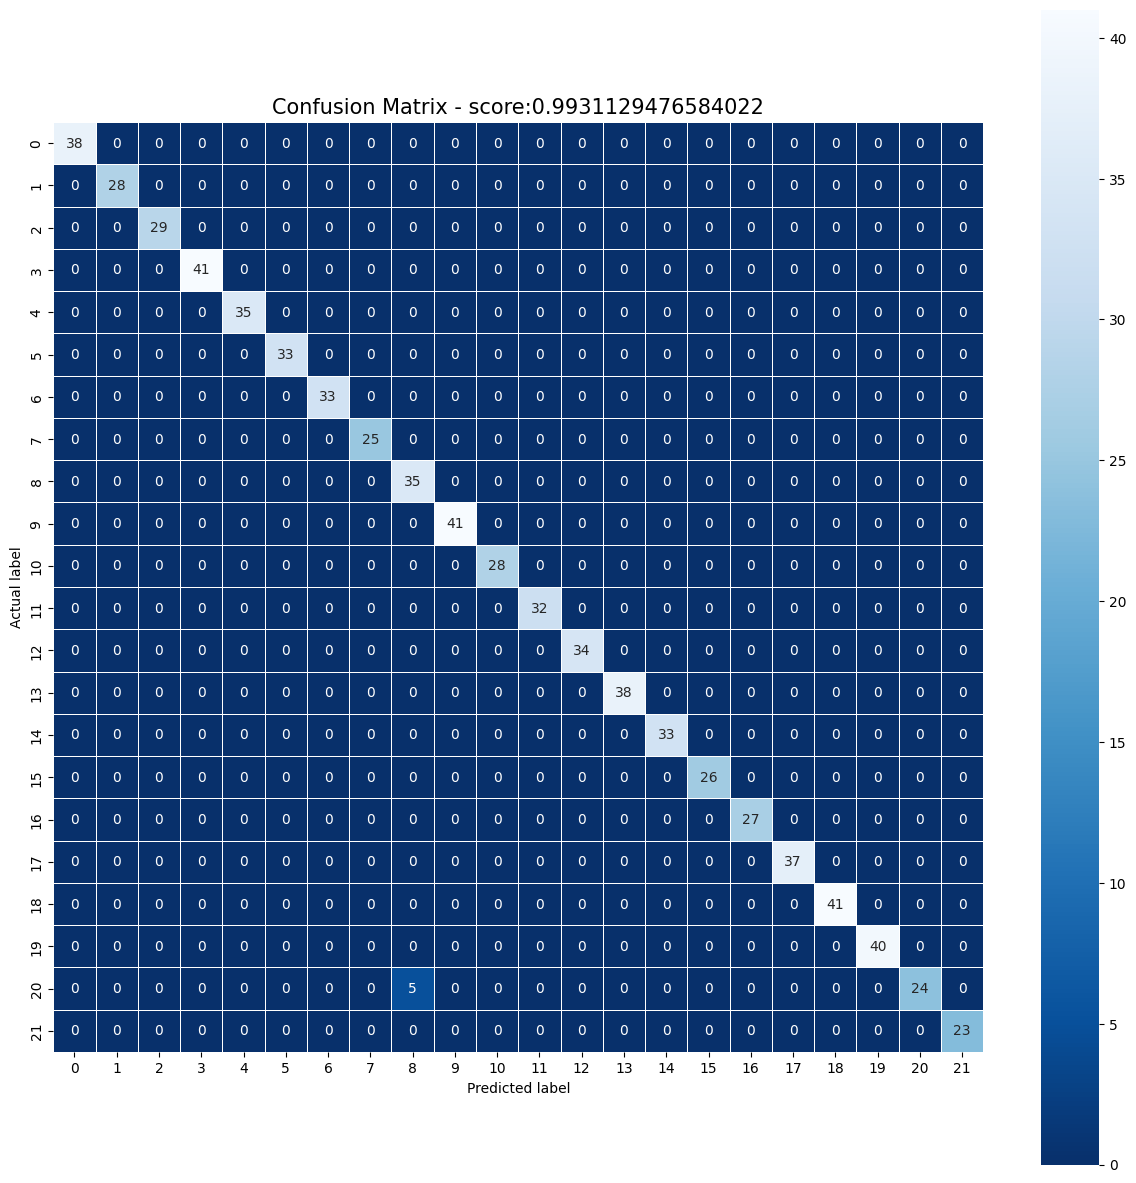

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       1.00      1.00      1.00        28
           2       1.00      1.00      1.00        29
           3       1.00      1.00      1.00        41
           4       1.00      1.00      1.00        35
           5       1.00      1.00      1.00        33
           6       1.00      1.00      1.00        33
           7       1.00      1.00      1.00        25
           8       0.88      1.00      0.93        35
           9       1.00      1.00      1.00        41
          10       1.00      1.00      1.00        28
          11       1.00      1.00      1.00        32
          12       1.00      1.00      1.00        34
          13       1.00      1.00      1.00        38
          14       1.00      1.00      1.00        33
          15       1.00      1.00      1.00        26
          16       1.00      1.00      1.00        27
          17       1.00    

In [ ]:
model=RandomForestClassifier(random_state=0)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

from sklearn import metrics

cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(15,15))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(metrics.accuracy_score(y_test,y_pred))
plt.title(all_sample_title, size = 15);
plt.show()
print(metrics.classification_report(y_test,y_pred))

In [ ]:
import pickle

# Save the trained model
with open('crop_recommendation_model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

# Save the label encoder
with open('label_encoder.pkl', 'wb') as encoder_file:
    pickle.dump(label_encoder, encoder_file)

# Download the files to your local machine
from google.colab import files
files.download('crop_recommendation_model.pkl')
files.download('label_encoder.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>